In [1]:
import cv2
import keras
import keras.losses

from getABSDData import getABSDDataMask
from Model import RetrainedClassificationModel, SegNetModel

Using TensorFlow backend.


In [2]:
from Utilities.Metrics import precision, recall, f1, f2, iou, MetricsCallback, pred_area, true_area
keras.metrics.precision = precision
keras.metrics.recall = recall
keras.metrics.f1 = f1
keras.metrics.f2 = f2
keras.metrics.iou = iou
keras.metrics.pred_area = pred_area
keras.metrics.true_area = true_area

In [3]:
model = SegNetModel('noname', use_residual=False)
model.load('segnet.01-0.07.hdf5')

Done building encoder..
Done building decoder..


In [6]:
n_training_images = 3
image_converter = lambda x: x/255
label_converter = lambda x: cv2.resize(x, (image_size, image_size))

training, dev, _ = getABSDDataMask(n_training_images, label_converter=label_converter, image_converter=image_converter,
                                   reduced_size=16, remove_nan=True)

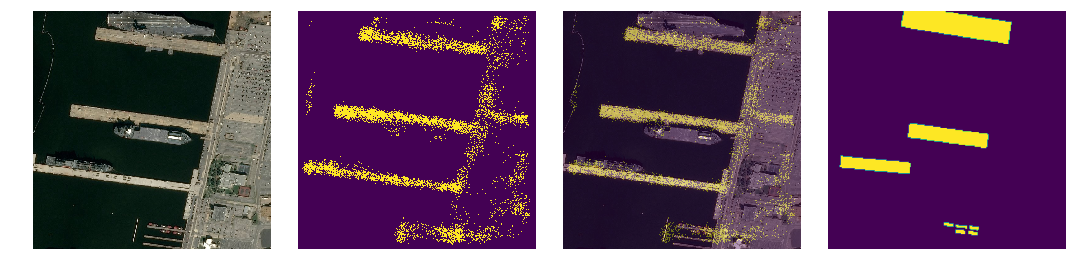

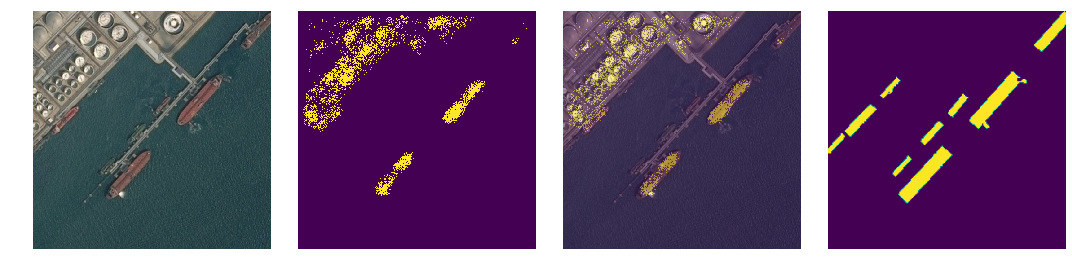

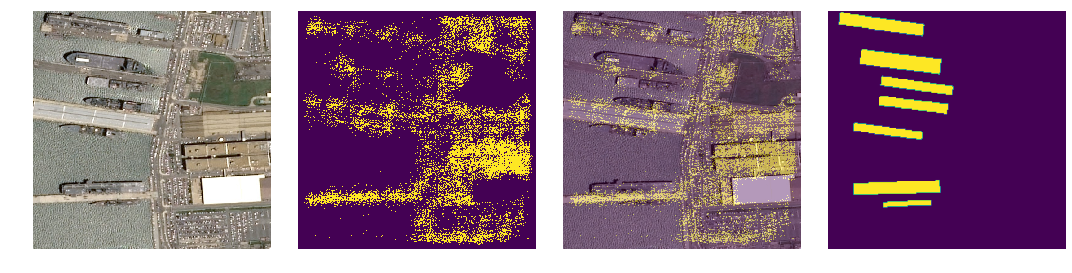

In [7]:
i, m = dev[0]
import matplotlib .pyplot as plt
import numpy as np
for id in range(n_training_images):
    test_image = np.expand_dims(i[id,:,:,:],0)
    prediction = np.argmax(model.model.predict(test_image), axis=-1)
    cut_prediction = np.reshape(prediction, (768,768))
    cut_img = test_image[0]
    actual_mask = cv2.resize(np.reshape(m[id], (image_size, image_size)), (768,768))
    
    fig, axarr = plt.subplots(1, 4, figsize=(15, 40))
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[3].axis('off')
    axarr[0].imshow(cut_img)
    axarr[1].imshow(cut_prediction)
    axarr[2].imshow(cut_img)
    axarr[2].imshow(cut_prediction, alpha=0.4)
    axarr[3].imshow(actual_mask)
    plt.tight_layout(h_pad=0.1, w_pad=0.1)
    plt.show()